In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(10,10)})

# Problem 4: Central Limit Theorem

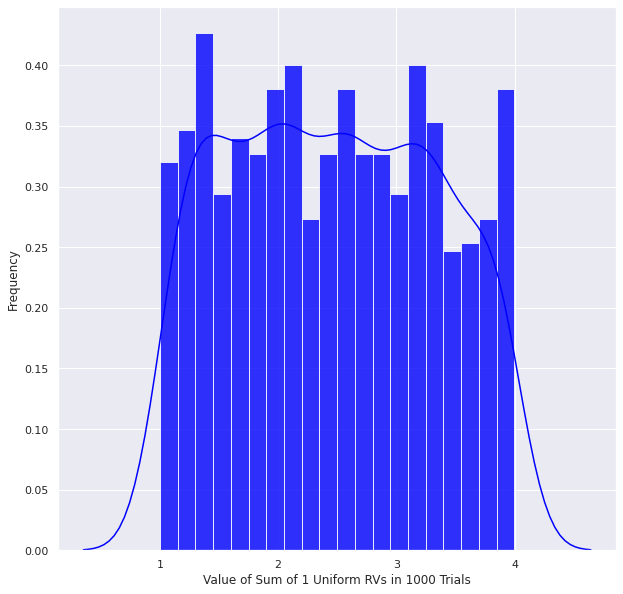

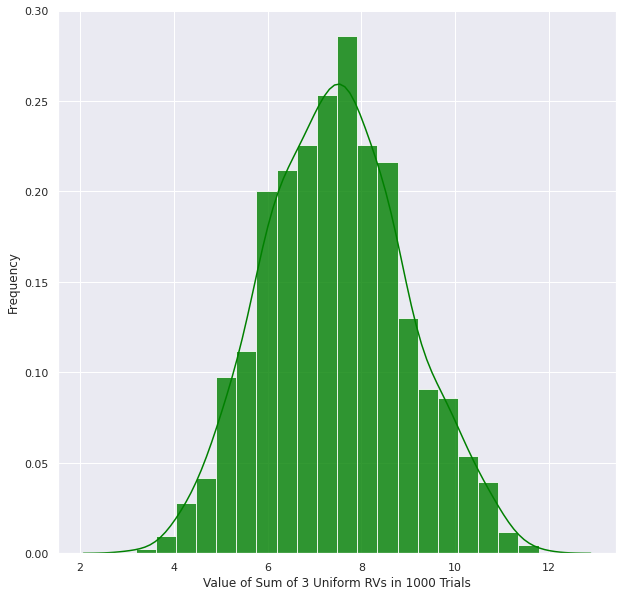

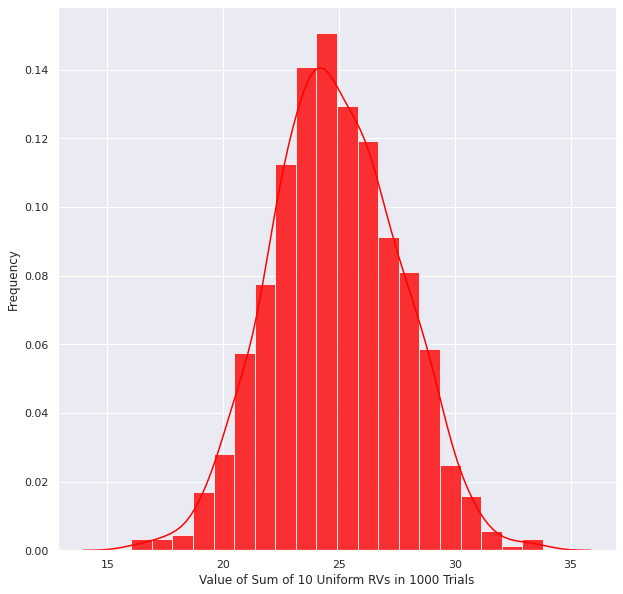

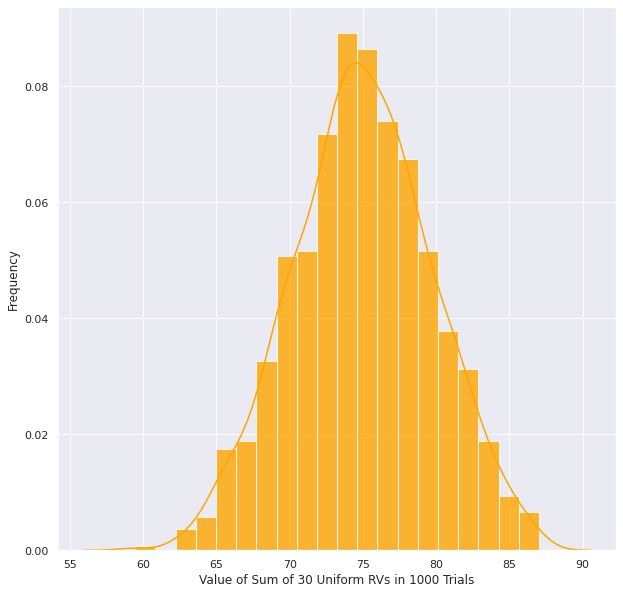

In [36]:
n_vec = [1, 3, 10, 30]
n_trials = 1000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

        sums.append(np.sum(values))
        
    plt.figure()

    ax = sns.distplot(sums,
              bins=20,
              label="n={}".format(n),
              kde=True,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 1,'alpha':0.8})
    ax.set(xlabel='Value of Sum of {} Uniform RVs in {} Trials'.format(n, n_trials), ylabel='Frequency')
    #ax.legend()
    

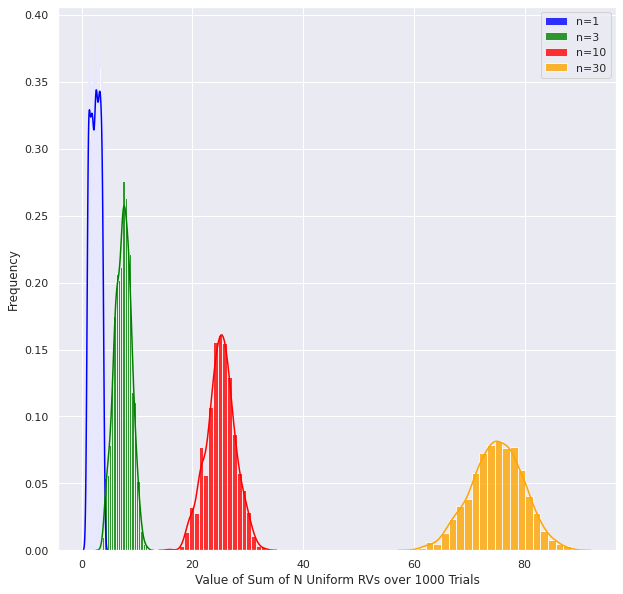

In [35]:
n_vec = [1, 3, 10, 30]
n_trials = 1000

colors = ['blue', 'green', 'red', 'orange']

def get_xi():
    return np.random.uniform(1, 4)

for n in n_vec:
    sums = []
    
    for i in range(0, n_trials):
        
        values = []
        
        for j in range(0, n):
            value = get_xi()
            values.append(value)

        sums.append(np.sum(values))
        
    #plt.figure()

    ax = sns.distplot(sums,
              bins=20,
              label="n={}".format(n),
              kde=True,
              color=colors[n_vec.index(n)],
              hist_kws={"linewidth": 1,'alpha':0.8})
    ax.set(xlabel='Value of Sum of N Uniform RVs over {} Trials'.format(n_trials), ylabel='Frequency')
    ax.legend()